# Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = argmax_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here(5 points)**   

##################################     
TODO: Derive you answer hear
When we want to compute the gradients of $W$, $b$.
Suppose that the $W_k$ is the max.
Suppose the loss function is 
* $L(W,b)=-sum(y^i*I[mistake~on~x])$

Therefore, if there is no mistake, $L=0$, and we don't change $W,b$,
otherwise,
* $\partial{L}/\partial{W} = -\partial{(W*x^{i}+b)}/\partial{W} = -x^i$
* $\partial{L}/\partial{b} = -\partial{(W*x^{i}+b)}/\partial{b} = -I$ 

Therefore, if the answer is k while our prediction dosen't match,
* $W^i_{t+1} = W^i_{t} + lr*x^i, i=k$
* $W^i_{t+1} = W^i_{t} - lr*x^i, i!=k$
* $b^i_{t+1} = b^i_{t} + lr*I, i=k$
* $b^i_{t+1} = b^i_{t} - lr*I, i!=k$

#################################
                              
                        

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [2]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [3]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_test.shape)
print(type(y_train))

X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (45,)
<class 'numpy.ndarray'>


In [4]:
class MultiClsPLA(object):
    
    ## We recommend to absorb the bias into weight.  W = [w, b]
    
    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.unique = np.unique(y_train)
        self.weight = self.initial_weight(weight_dimension, num_cls) #
        self.sample_mean = np.mean(self.X_train, 0) # vector
        self.sample_std = np.std(self.X_train, 0) # vector
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []
          
    def initial_weight(self, weight_dimension, num_cls):
        weight = None
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  samll std and zero mean gaussian   ##
        weight = np.random.randn(weight_dimension + 1, num_cls) # (n+1) * m
        #########################################
        return weight
        
    def data_preprocessing(self, data): # normlize input data
        #####################################
        ##  ToDO: Normlize the data        ##
        norm_data = (data-self.sample_mean)/self.sample_std
        #####################################
        return norm_data
    
    def train_step(self, X_train, y_train, shuffle_idx):
        np.random.shuffle(shuffle_idx) # shuffle the idx
        X_train = X_train[shuffle_idx] # drawbacks -- add : np.array
        y_train = y_train[shuffle_idx]
        train_acc = None
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        out_put = np.matmul(X_train, self.weight) # out_put num_sample * m
        pre = np.argmax(out_put, axis=1) # prediction numsample * 1
        for i in range(len(pre)):
            if pre[i] != y_train[i]:
                change = self.lr * X_train[i] # change 1 * (n+1)
                for j in range(len(self.unique)):
                    if j != y_train[i]:
                        self.weight[:, j] = self.weight[:, j] - change
                    else:
                        self.weight[:, j] = self.weight[:, j] + change 
        out_put = np.matmul(X_train, self.weight) # out_put num_sample * m
        pre = np.argmax(out_put, axis=1) # prediction numsample * 1
        train_acc = np.sum((pre - y_train) == 0) / len(y_train)
        ##############################################
        
        return train_acc
        
    def test_step(self, X_test, y_test):
        
        X_test = self.data_preprocessing(data=X_test)
        num_sample = X_test.shape[0]
        test_acc = None
        
        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        X_test = np.c_[X_test, np.ones((num_sample,1))]
        out_put = np.matmul(X_test, self.weight) # out_put num_sample * m
        pre = np.argmax(out_put, axis=1) # prediction numsample * 1
        test_acc = np.sum((pre - y_test) == 0) / num_sample
        #########################################
           
        return test_acc
        
    def train(self):
           
        self.X_train = self.data_preprocessing(data=self.X_train)
        num_sample = self.X_train.shape[0]
        
        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        self.X_train = np.c_[self.X_train, np.ones((num_sample,1))] # num_sample * (n+1)
        ######################################################
        
        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'tst_acc:%.3f'%tst_acc)
    
    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show(0)

epoch: 0 traing_acc:0.714 tst_acc:0.600
epoch: 1 traing_acc:0.857 tst_acc:0.800
epoch: 2 traing_acc:0.924 tst_acc:0.911
epoch: 3 traing_acc:0.914 tst_acc:0.933
epoch: 4 traing_acc:0.924 tst_acc:0.978
epoch: 5 traing_acc:0.933 tst_acc:0.978
epoch: 6 traing_acc:0.952 tst_acc:0.978
epoch: 7 traing_acc:0.943 tst_acc:0.978
epoch: 8 traing_acc:0.952 tst_acc:0.978
epoch: 9 traing_acc:0.962 tst_acc:0.978
epoch: 10 traing_acc:0.952 tst_acc:0.978
epoch: 11 traing_acc:0.962 tst_acc:0.956
epoch: 12 traing_acc:0.971 tst_acc:0.978
epoch: 13 traing_acc:0.962 tst_acc:0.956
epoch: 14 traing_acc:0.971 tst_acc:0.978
epoch: 15 traing_acc:0.971 tst_acc:0.978
epoch: 16 traing_acc:0.981 tst_acc:0.978
epoch: 17 traing_acc:0.962 tst_acc:0.956
epoch: 18 traing_acc:0.971 tst_acc:0.978
epoch: 19 traing_acc:0.952 tst_acc:0.956
epoch: 20 traing_acc:0.971 tst_acc:0.978
epoch: 21 traing_acc:0.952 tst_acc:0.956
epoch: 22 traing_acc:0.981 tst_acc:0.978
epoch: 23 traing_acc:0.962 tst_acc:0.956
epoch: 24 traing_acc:0.962

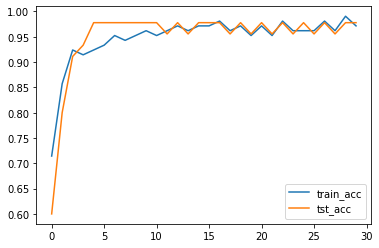

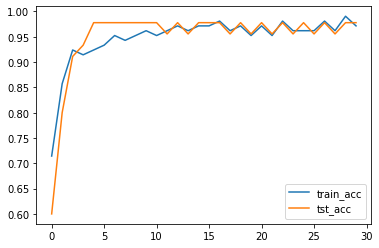

In [5]:
np.random.seed(0)
random.seed(0)
#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches
model = MultiClsPLA(X_train, y_train, X_test, y_test, lr=0.02, num_epoch=30, weight_dimension=4, num_cls=3)
model.train()
model.vis_acc_curve()